<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-13 23:45:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.7MB/s    in 3.2s    

2025-05-13 23:45:33 (62.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 164.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 82.7 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 80.2 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)



   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


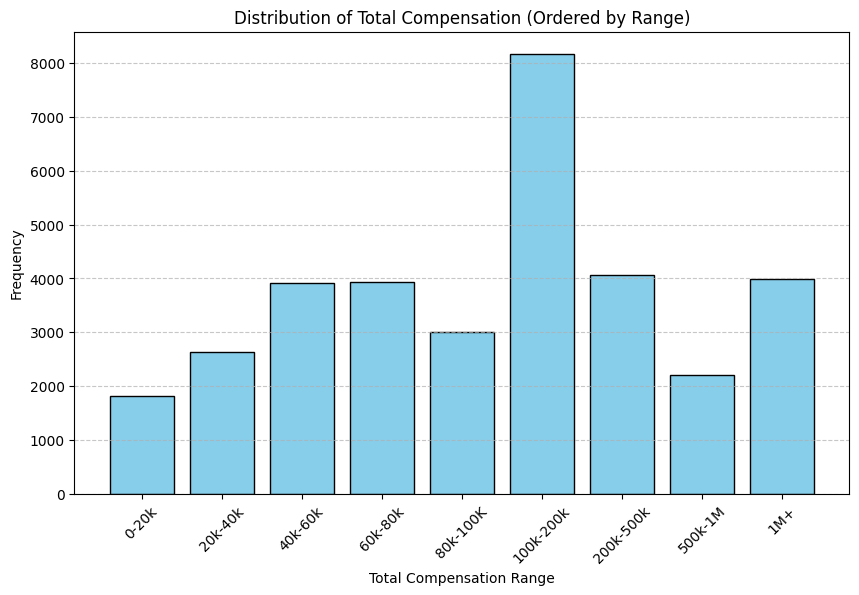

In [10]:
## Write your code here

import matplotlib.pyplot as plt

QUERY = """
SELECT 
    CASE 
         WHEN CompTotal < 20000 THEN '0-20k'
         WHEN CompTotal >= 20000 AND CompTotal < 40000 THEN '20k-40k'
         WHEN CompTotal >= 40000 AND CompTotal < 60000 THEN '40k-60k'
         WHEN CompTotal >= 60000 AND CompTotal < 80000 THEN '60k-80k'
         WHEN CompTotal >= 80000 AND CompTotal < 100000 THEN '80k-100K'
         WHEN CompTotal >= 100000 AND CompTotal < 200000 THEN '100k-200k'
         WHEN CompTotal >= 200000 AND CompTotal < 500000 THEN '200k-500k'
         WHEN CompTotal >= 500000 AND CompTotal < 1000000 THEN '500k-1M'
         ELSE '1M+'
    END AS CompTotalRange,
    COUNT(*) AS Frequency
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY CompTotalRange;
"""

# Load the SQL results into a pandas DataFrame
df_CompTotal = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Define the correct order for compensation ranges
comp_order = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100K', 
              '100k-200k', '200k-500k', '500k-1M', '1M+']

# Convert to categorical with proper ordering
df_CompTotal['CompTotalRange'] = pd.Categorical(df_CompTotal['CompTotalRange'], categories=comp_order, ordered=True)

# Sort DataFrame based on the defined order
df_CompTotal = df_CompTotal.sort_values('CompTotalRange')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_CompTotal['CompTotalRange'], df_CompTotal['Frequency'], color='skyblue', edgecolor='black')
plt.xlabel('Total Compensation Range')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation (Ordered by Range)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


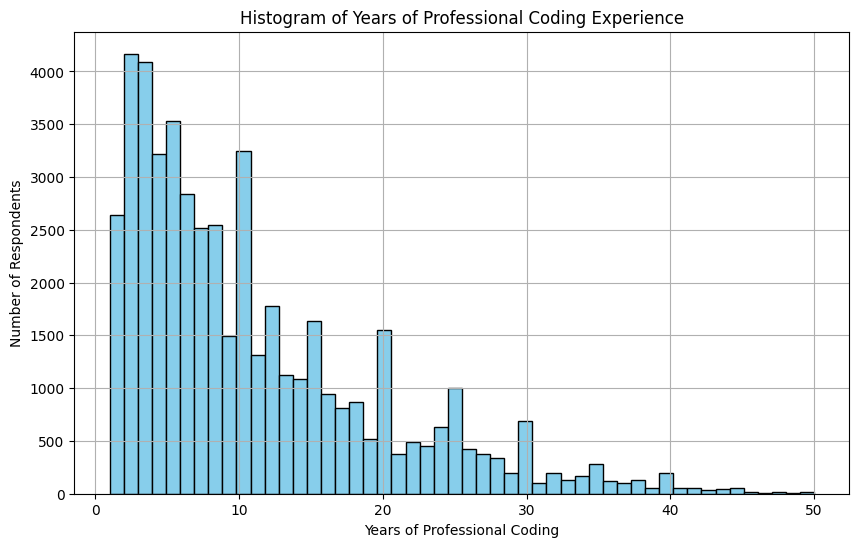

In [23]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get the data
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""

# Load the SQL results into a pandas DataFrame
df_YearsCodePro = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Convert 'YearsCodePro' to numeric, setting errors='coerce' to handle non-numeric values
df_YearsCodePro['YearsCodePro'] = pd.to_numeric(df_YearsCodePro['YearsCodePro'], errors='coerce')

# Drop NaNs
df_YearsCodePro.dropna(subset=['YearsCodePro'], inplace=True)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_YearsCodePro['YearsCodePro'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Number of Respondents')
plt.grid(True)

plt.show()



### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


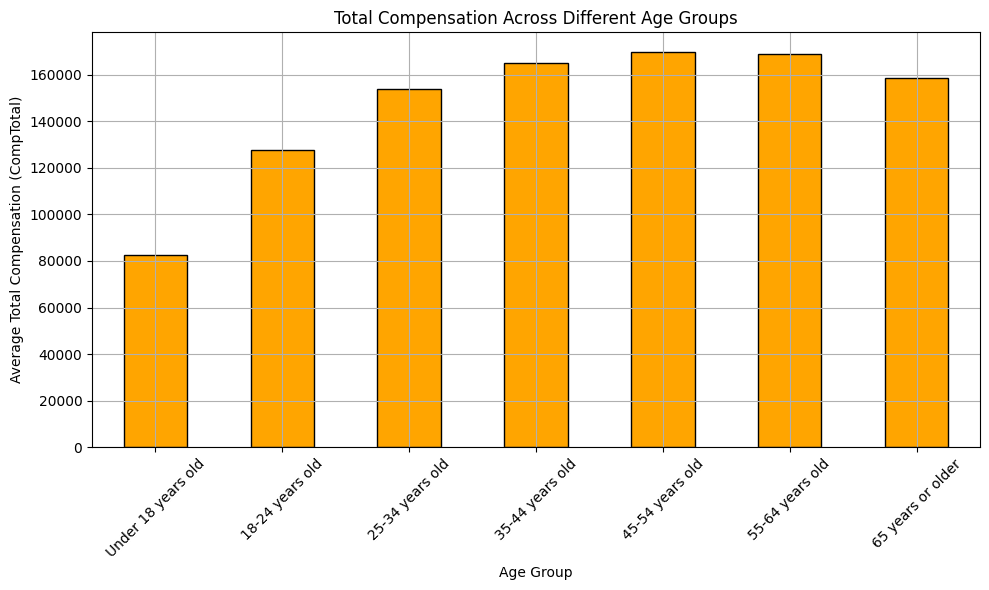

In [13]:
## Write your code here

#connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define you SQL query
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL 
AND CompTotal IS NOT NULL;
"""
# Execute the SQL query and load results into Pandas
df = pd.read_sql_query(QUERY, conn)


# Ensure that CompTotal is numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows where 'CompTotal' or 'Age' is NaN
df.dropna(subset=['CompTotal', 'Age'], inplace=True)

# Remove unrealistic values (e.g., above $1 million)
df = df[df['CompTotal'] < 1_000_000]

# Map the Age column to midpoints of age ranges
mapping_age_group = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}

# Map the 'Age' column to the midpoints of each group
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Define the age groups
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# Calculate the average 'CompTotal' for each age group
age_group_avg_compensation = df.groupby('AgeMapped')['CompTotal'].mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
age_group_avg_compensation.plot(kind='bar', color='orange', edgecolor='black')

# Set the x-ticks to be the age group names
plt.xticks(ticks=range(len(age_groups)), labels=age_groups, rotation=45)

# Customize the plot
plt.title('Total Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Total Compensation (CompTotal)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


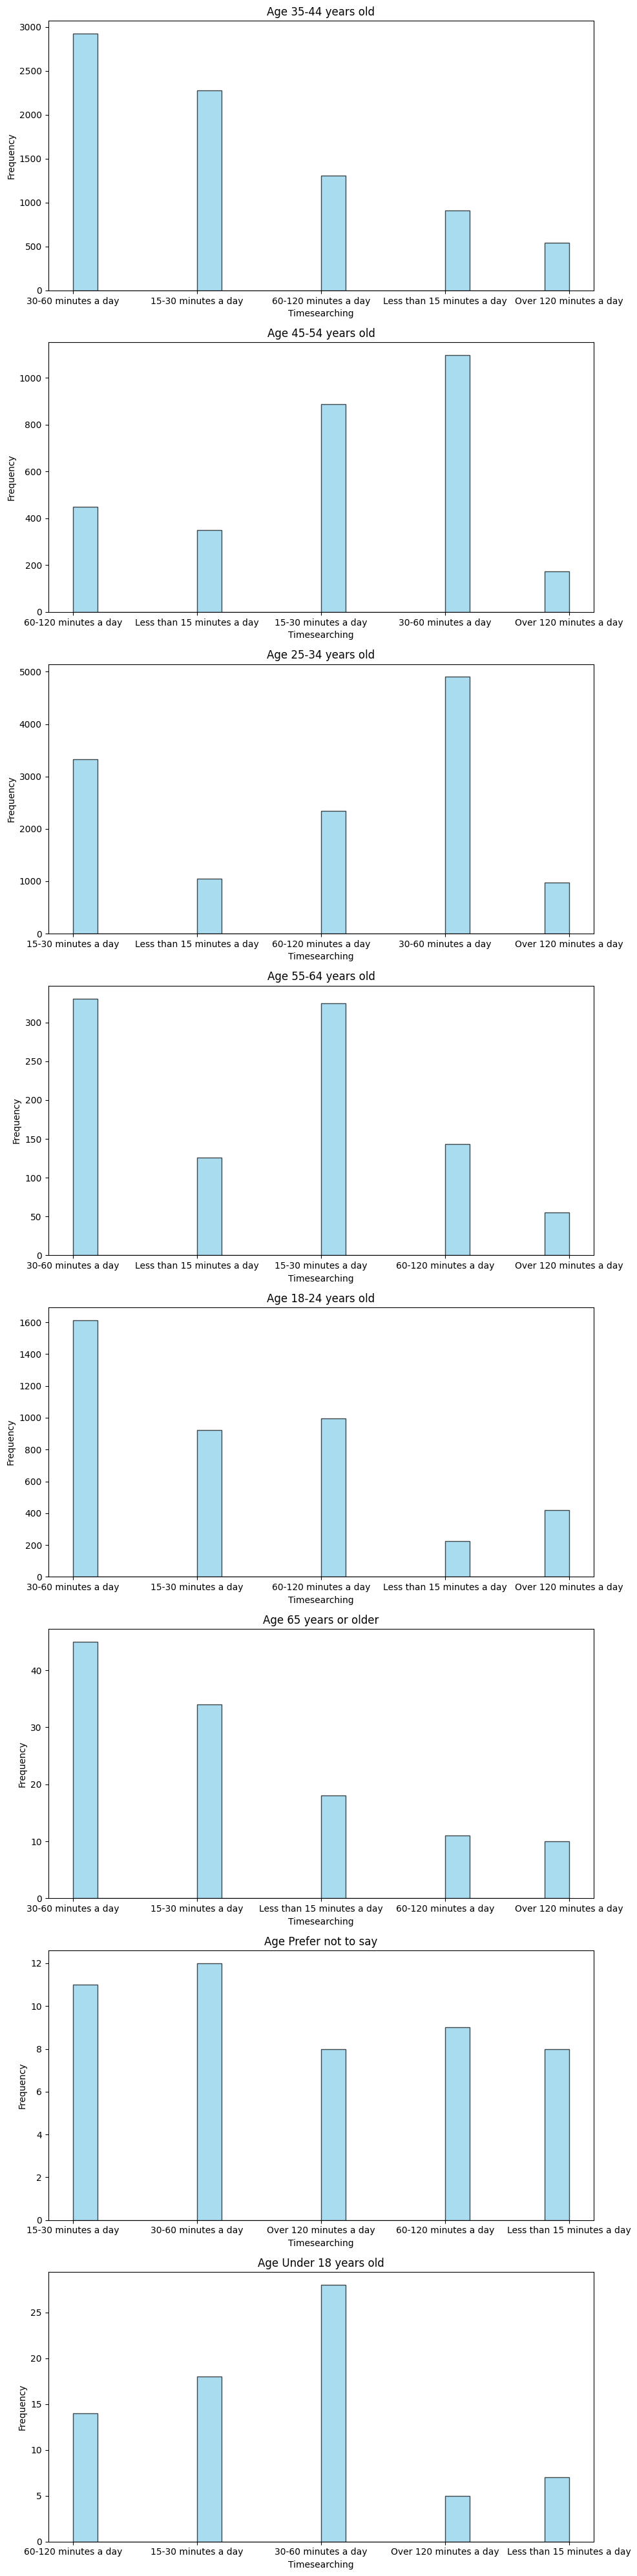

In [1]:
## Write your code here

## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get the data
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""
# Load the SQL results into a pandas DataFrame
df_timesearching = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Create subplots for each age group
age_groups = df_timesearching['Age'].unique()
num_groups = len(age_groups)
fig, axes = plt.subplots(nrows=num_groups, ncols=1, figsize=(10, 5 * num_groups))

for i, age in enumerate(age_groups):
    subset = df_timesearching[df_timesearching['Age'] == age]
    axes[i].hist(subset['TimeSearching'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age {age}')
    axes[i].set_xlabel('Timesearching')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


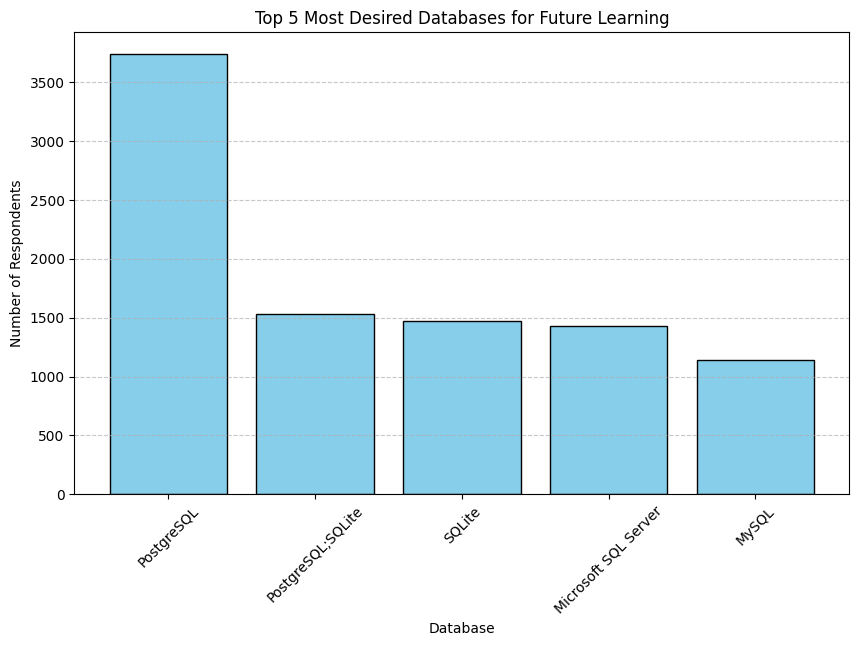

In [5]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get the data
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS Number_of_Respondents
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY Number_of_Respondents DESC
LIMIT 5
"""
# Load the SQL results into a pandas DataFrame
df_top_databases = pd.read_sql_query(QUERY, conn)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(df_top_databases['DatabaseWantToWorkWith'], df_top_databases['Number_of_Respondents'], color='skyblue', edgecolor='black')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


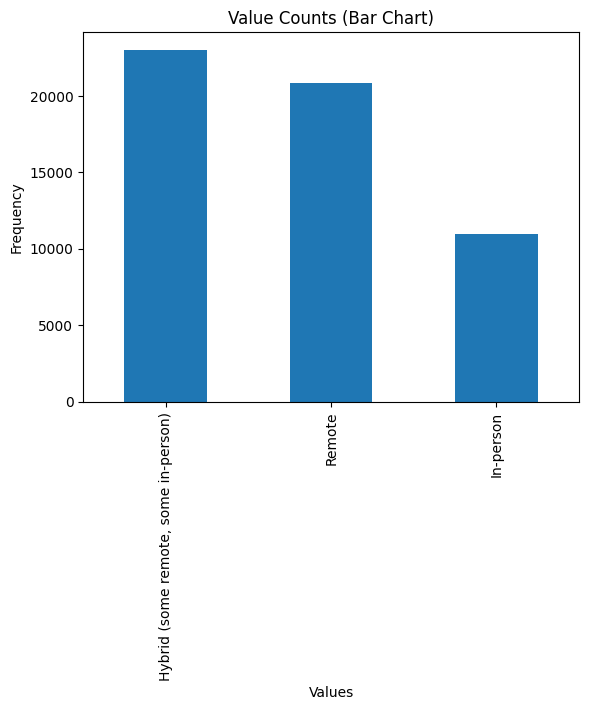

In [13]:
## Write your code here


# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get the data
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL;
"""

# Load the SQL results into a pandas DataFrame
df_remotework = pd.read_sql_query(QUERY, conn)

df_remotework

value_counts_remotework = df['RemoteWork'].value_counts()
print(value_counts_remotework)

value_counts_remotework.plot(kind='bar')
plt.title('Value Counts (Bar Chart)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


                  Age  CompTotal
0     45-54 years old    95000.0
1     45-54 years old   195000.0
2     55-64 years old    54000.0
3     45-54 years old   145000.0
4     55-64 years old    80000.0
...               ...        ...
4790  45-54 years old    40000.0
4791  45-54 years old   250000.0
4792  45-54 years old   250000.0
4793  45-54 years old   157000.0
4794  45-54 years old    55000.0

[4795 rows x 2 columns]


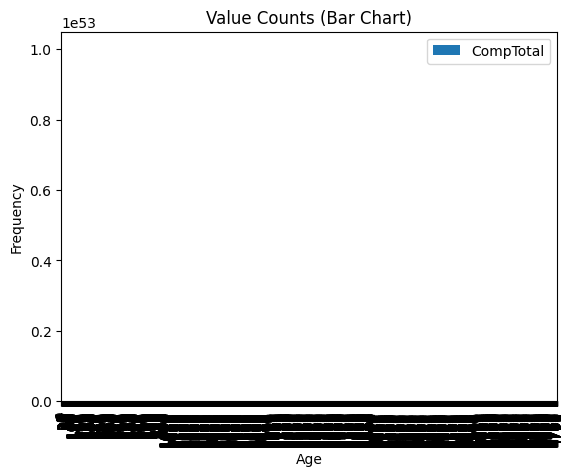

In [17]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get the data
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
AND CompTotal IS NOT NULL
AND Age IS NOT NULL;
"""

df_45_60_CompTotal =  pd.read_sql_query(QUERY, conn)

df_45_60_CompTotal

# Ensure 'CompTotal' is numeric
df_45_60_CompTotal['CompTotal'] = pd.to_numeric(df_45_60_CompTotal['CompTotal'], errors='coerce')

# Drop rows with NaN values in 'CompTotal'
df_45_60_CompTotal.dropna(subset=['CompTotal'], inplace=True)

# Count occurencies in each age
age_counts = df_45_60_CompTotal['Age'].value_counts().sort_index()
age_counts

print (df_45_60_CompTotal)

df_45_60_CompTotal.plot(kind='bar')
plt.title('Value Counts (Bar Chart)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to get the data
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""

# Load the SQL results into a pandas DataFrame
df_JobSat = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Convert 'YearsCodePro' to numeric, setting errors='coerce' to handle non-numeric values
df_JobSat['YearsCodePro'] = pd.to_numeric(df_JobSat['YearsCodePro'], errors='coerce')

# Drop rows with NaN values in 'YearsCodePro'
df_JobSat.dropna(subset=['YearsCodePro'], inplace=True)

# Define bins for grouping 'YearsCodePro'
bins = [0, 1, 5, 10, 20, 30, 40, 50, 60]  # Adjust these bins as needed
labels = ['<1', '1-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50+']

# Create a new column for the binned data
df_JobSat['YearsCodePro_Binned'] = pd.cut(df_JobSat['YearsCodePro'], bins=bins, labels=labels, right=False)

# Plot the histogram for JobSat scores based on binned YearsCodePro
plt.figure(figsize=(12, 8))
for label in labels:
    subset = df_JobSat[df_JobSat['YearsCodePro_Binned'] == label]
    plt.hist(subset['JobSat'], bins=10, alpha=0.5, label=f'{label} years')

plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.title('Job Satisfaction Scores by Years of Professional Coding Experience (Binned)')
plt.legend(title='Years of Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
